In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv(r"C:\Users\ACER\Desktop\Miuul\persona.csv")

# GÖREV 1

In [2]:
df.head()


,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [3]:
df.dtypes

PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object

In [4]:
df.isnull().sum()

PRICE      0
SOURCE     0
SEX        0
COUNTRY    0
AGE        0
dtype: int64

In [5]:
#1.2
df.SOURCE.nunique()
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

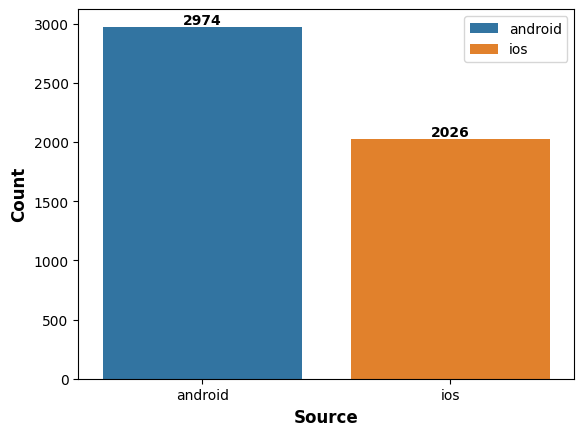

In [6]:
#1.2?
fig,ax=plt.subplots()
sns.countplot(x=df.SOURCE,label=df.SOURCE.unique())
ax.set_xlabel("Source",fontsize=12,fontweight="bold")
ax.set_ylabel("Count",fontsize=12,fontweight="bold")
ax.legend(df.SOURCE.unique())
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points',
                fontsize=10,
                fontweight='bold')

plt.show()

In [7]:
#1.3
df.PRICE.nunique()

6

In [8]:
#1.4
df.PRICE.value_counts().to_frame()

,PRICE
29,1305
39,1260
49,1031
19,992
59,212
9,200


In [9]:
#1.5
df.COUNTRY.value_counts().to_frame()

,COUNTRY
usa,2065
bra,1496
deu,455
tur,451
fra,303
can,230


In [10]:
#1.6
df.groupby('COUNTRY').agg({'PRICE': 'sum'}).reset_index()

,COUNTRY,PRICE
0,bra,51354
1,can,7730
2,deu,15485
3,fra,10177
4,tur,15689
5,usa,70225


In [11]:
#1.7
df.groupby('SOURCE').agg({'PRICE': 'count'}).reset_index()

,SOURCE,PRICE
0,android,2974
1,ios,2026


In [12]:
#1.8
df.groupby('COUNTRY').agg({'PRICE': 'mean'}).reset_index()

,COUNTRY,PRICE
0,bra,34.327540
1,can,33.608696
2,deu,34.032967
3,fra,33.587459
4,tur,34.787140
5,usa,34.007264


In [13]:
#1.9
df.groupby('SOURCE').agg({'PRICE': 'mean'}).reset_index()

,SOURCE,PRICE
0,android,34.174849
1,ios,34.069102


In [14]:
#1.10
df.groupby(["COUNTRY","SOURCE"]).agg({"PRICE":"mean"}).reset_index()

,COUNTRY,SOURCE,PRICE
0,bra,android,34.387029
1,bra,ios,34.222222
2,can,android,33.330709
3,can,ios,33.951456
4,deu,android,33.869888
5,deu,ios,34.268817
6,fra,android,34.312500
7,fra,ios,32.776224
8,tur,android,36.229437
9,tur,ios,33.272727


# GÖREV 2

In [15]:
df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE":"mean"}).reset_index()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,female,15,38.714286
1,bra,android,female,16,35.944444
2,bra,android,female,17,35.666667
3,bra,android,female,18,32.255814
4,bra,android,female,19,35.206897
...,...,...,...,...,...
343,usa,ios,male,42,30.250000
344,usa,ios,male,50,39.000000
345,usa,ios,male,53,34.000000
346,usa,ios,male,55,29.000000


# GÖREV 3 - GÖREV 4

In [16]:
df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE":"mean"}).sort_values(by="PRICE",ascending=False).reset_index()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0
...,...,...,...,...,...
343,usa,ios,female,38,19.0
344,usa,ios,female,30,19.0
345,can,android,female,27,19.0
346,fra,android,male,18,19.0


# GÖREV 5

In [17]:
df["AGE_BIN"] = pd.cut(df.AGE,
                       bins=[0, 18, 23, 30, 40, 55, 70],
                       labels=["0_18", "19_23", "24_30", "31_40", "41_55", "56_70"]
                       )


In [18]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE,AGE_BIN
0,39,android,male,bra,17,0_18
1,39,android,male,bra,17,0_18
2,49,android,male,bra,17,0_18
3,29,android,male,tur,17,0_18
4,49,android,male,tur,17,0_18


# GÖREV 6

In [19]:
df['CUSTOMERS_LEVEL_BASED'] = ['_'.join(col) for col in df.drop(['AGE', 'PRICE'], axis=1).values]

In [20]:
df.drop(["SOURCE","SEX","COUNTRY","AGE","AGE_BIN"],axis=1,inplace=True)
df=df.groupby('CUSTOMERS_LEVEL_BASED').agg({"PRICE":"mean"})

# GÖREV 7

In [21]:
df['SEGMENT'] = pd.cut(df['PRICE'], 4, labels=['D', 'C', 'B', 'A'])

In [22]:
df.head()

,PRICE,SEGMENT
CUSTOMERS_LEVEL_BASED,,
android_female_bra_0_18,35.439394,B
android_female_bra_19_23,34.114943,B
android_female_bra_24_30,34.540541,B
android_female_bra_31_40,34.696203,B
android_female_bra_41_55,34.555556,B


# GÖREV 8

In [26]:
df.loc[(df.index == "android_female_tur_31_40")]

,PRICE,SEGMENT
CUSTOMERS_LEVEL_BASED,,
android_female_tur_31_40,41.727273,A


In [27]:
df.loc[(df.index == "ios_male_fra_31_40")]

,PRICE,SEGMENT
CUSTOMERS_LEVEL_BASED,,
ios_male_fra_31_40,35.521739,B
